In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'

### Comparando os dados corrigidos com a tabela do alerta_dengue: 

In [2]:
df2 = pd.read_csv('casos_updated.csv.gz', index_col = 'Unnamed: 0')

df2.data_iniSE = pd.to_datetime(df2.data_iniSE)

df2.set_index('data_iniSE', inplace = True)

df2 = df2.loc[df2.index >= '2024-06-01']

df2 = df2.groupby('uf').resample('W-SUN').sum().drop(['regional', 'uf'], axis =1).reset_index()

df2.head()

,uf,data_iniSE,casos_est,casprov
0,AC,2024-06-02,144.0,32.0
1,AC,2024-06-09,157.0,25.0
2,AC,2024-06-16,144.0,29.0
3,AC,2024-06-23,134.0,30.0
4,AC,2024-06-30,162.0,34.0


In [3]:
df4 = pd.read_csv('casos_updated_se_38.csv.gz', index_col = 'Unnamed: 0')

df4.data_iniSE = pd.to_datetime(df4.data_iniSE)

df4.set_index('data_iniSE', inplace = True)

df4 = df4.loc[df4.index >= '2024-06-01']

df4 = df4.groupby('uf').resample('W-SUN').sum().drop(['regional', 'uf'], axis =1).reset_index()

df4.head()

,uf,data_iniSE,casos_est,casprov
0,AC,2024-06-02,144.0,32.0
1,AC,2024-06-09,157.0,25.0
2,AC,2024-06-16,144.0,29.0
3,AC,2024-06-23,134.0,30.0
4,AC,2024-06-30,162.0,32.0


In [4]:
df3 = pd.read_csv('dengue_update2.csv.gz', index_col = 'Unnamed: 0')

df3.date = pd.to_datetime(df3.date)

df3.set_index('date', inplace = True)

df3 = df3.loc[df3.index >= '2024-06-01']

df3 = df3.groupby('uf').resample('W-SUN').sum().drop(['regional_geocode', 'uf'], axis =1).reset_index()

df3.head()

,uf,date,casos
0,AC,2024-06-02,32.0
1,AC,2024-06-09,25.0
2,AC,2024-06-16,29.0
3,AC,2024-06-23,30.0
4,AC,2024-06-30,32.0


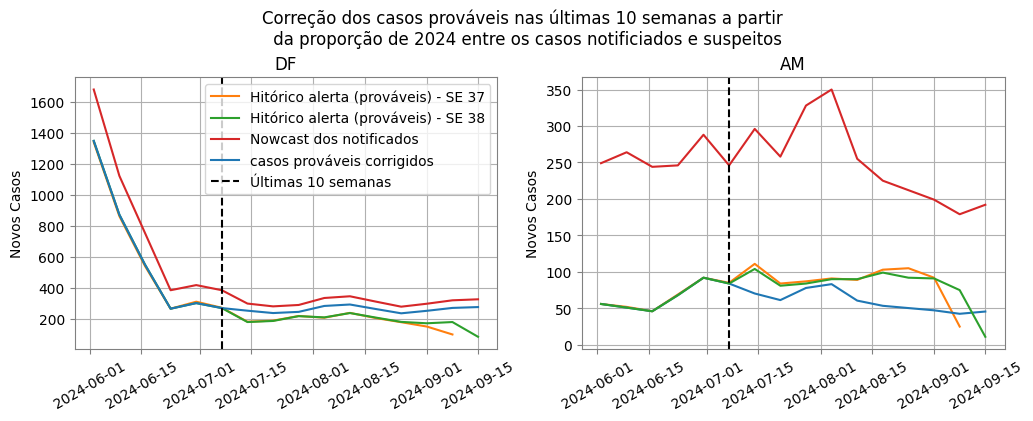

In [7]:
state = 'DF' 

fig,ax = plt.subplots(1,2, figsize = (12, 4))

#ax.plot(df1.loc[df1.uf == state].date, df1.loc[df1.uf == state].casos, color = 'tab:blue', label = 'Sprint')
ax[0].plot(df2.loc[df2.uf == state].data_iniSE, df2.loc[df2.uf == state].casprov, color = 'tab:orange', label = 'Hitórico alerta (prováveis) - SE 37')

ax[0].plot(df4.loc[df4.uf == state].data_iniSE, df4.loc[df4.uf == state].casprov, color = 'tab:green', label = 'Hitórico alerta (prováveis) - SE 38')

ax[0].plot(df4.loc[df4.uf == state].data_iniSE, df4.loc[df4.uf == state].casos_est, color = 'tab:red', label = 'Nowcast dos notificados')

ax[0].plot(df3.loc[df3.uf == state].date, df3.loc[df3.uf == state].casos, color = 'tab:blue', label = 'casos prováveis corrigidos')


ax[0].axvline(df3.loc[df3.uf == state].date.max() - pd.Timedelta(weeks=10), color = 'black', linestyle = '--', 
             label = 'Últimas 10 semanas')


ax[0].set_title(state)
ax[0].set_ylabel('Novos Casos')
ax[0].legend()
ax[0].grid()

state = 'AM'

ax[1].plot(df2.loc[df2.uf == state].data_iniSE, df2.loc[df2.uf == state].casprov, color = 'tab:orange', label = 'Hitórico alerta (prováveis)')

ax[1].plot(df4.loc[df4.uf == state].data_iniSE, df4.loc[df4.uf == state].casos_est, color = 'tab:red', label = 'Nowcast dos notificados')

ax[1].plot(df3.loc[df3.uf == state].date, df3.loc[df3.uf == state].casos, color = 'tab:blue', label = 'casos prováveis corrigidos')

ax[1].plot(df4.loc[df4.uf == state].data_iniSE, df4.loc[df4.uf == state].casprov, color = 'tab:green', label = 'Hitórico alerta (prováveis) - SE 38')

ax[1].axvline(df3.loc[df3.uf == state].date.max() - pd.Timedelta(weeks=10), color = 'black', linestyle = '--', 
             label = 'Últimas 10 semanas')


ax[1].set_title(state)
ax[1].set_ylabel('Novos Casos')
#ax[1].legend()
ax[1].grid()

fig.autofmt_xdate(rotation=30, ha='center')

plt.suptitle('Correção dos casos prováveis nas últimas 10 semanas a partir \n da proporção de 2024 entre os casos notificiados e suspeitos',
            y = 1.05)

plt.show()
    

### Comparando os dados do sprint e os dados corrigidos; 

In [5]:
df1 = pd.read_csv('dengue_up.csv.gz', index_col ='date', usecols = ['date', 'casos', 'uf'])

df1.index = pd.to_datetime(df1.index)

df1 = df1.loc[df1.index >= '2024-01-01']

df1 = df1.groupby('uf').resample('W-SUN').sum().drop('uf', axis =1).reset_index()

df1.head()

,uf,date,casos
0,AC,2024-01-07,587
1,AC,2024-01-14,645
2,AC,2024-01-21,561
3,AC,2024-01-28,408
4,AC,2024-02-04,237


In [6]:
df2 = pd.read_csv('dengue_update2.csv.gz', index_col ='date', usecols = ['date', 'casos', 'uf'])

df2.index = pd.to_datetime(df2.index)

df2 = df2.loc[df2.index >= '2024-01-01']

df2 = df2.groupby('uf').resample('W-SUN').sum().drop('uf', axis =1).reset_index()

df2.head()

,uf,date,casos
0,AC,2024-01-07,585.0
1,AC,2024-01-14,645.0
2,AC,2024-01-21,560.0
3,AC,2024-01-28,403.0
4,AC,2024-02-04,230.0


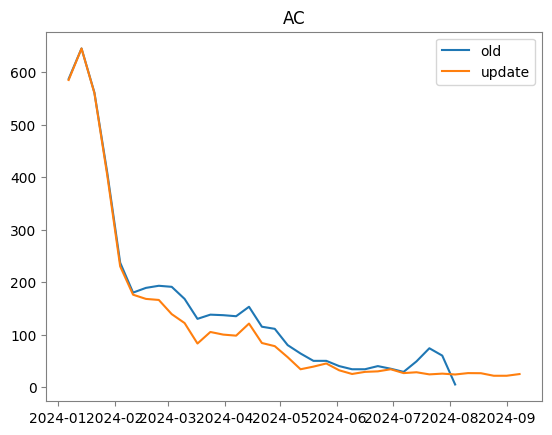

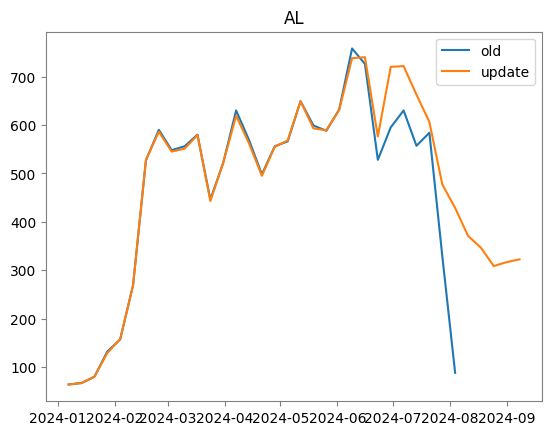

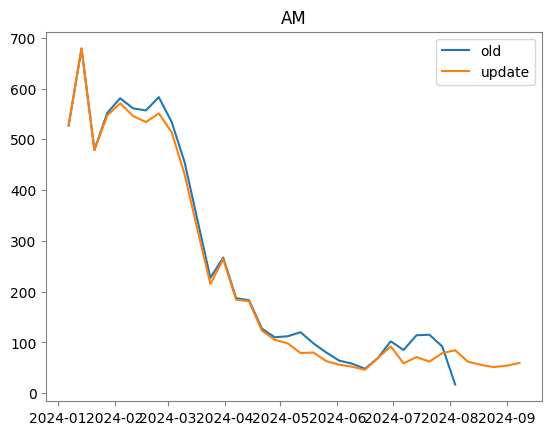

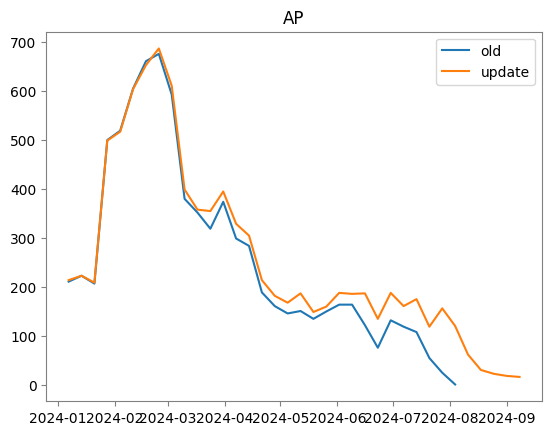

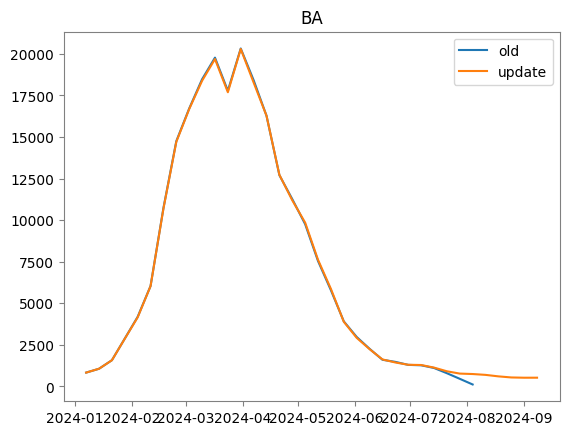

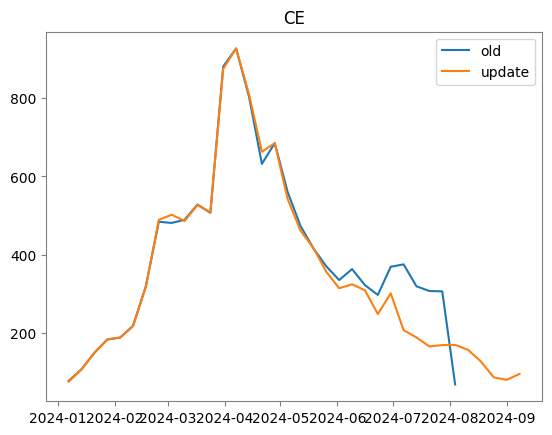

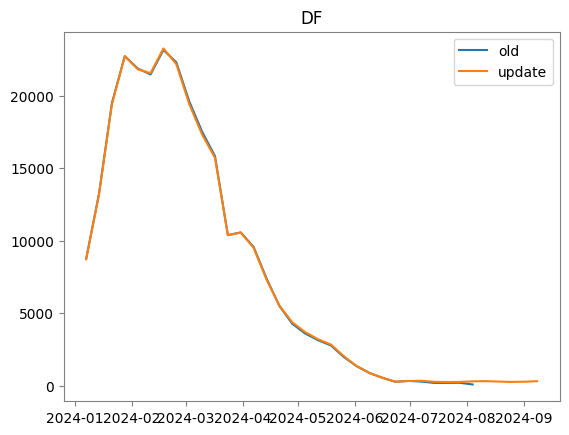

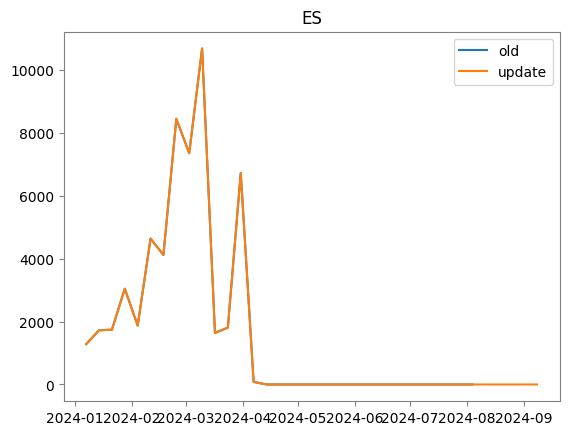

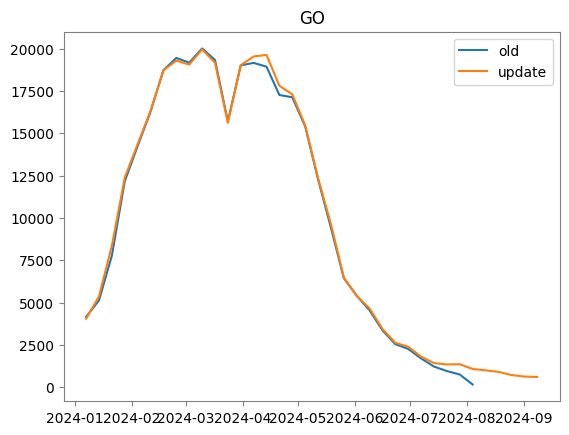

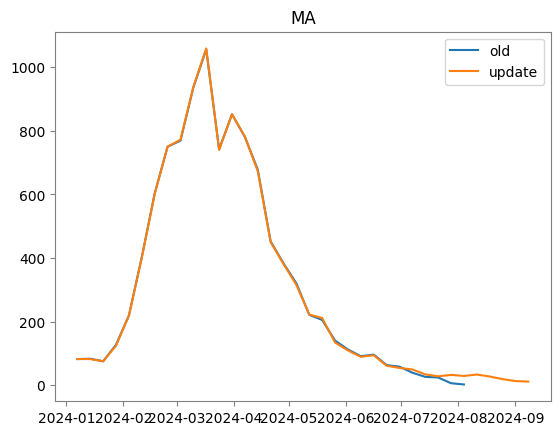

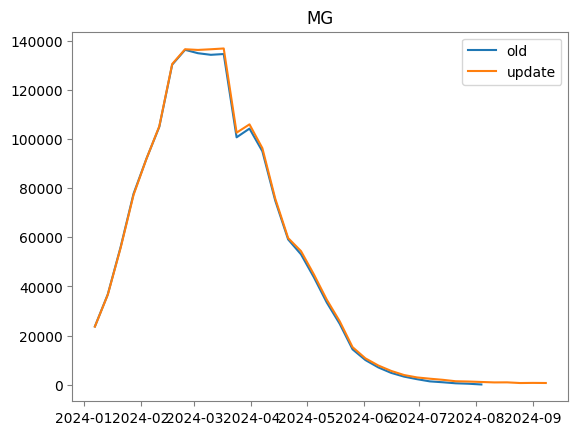

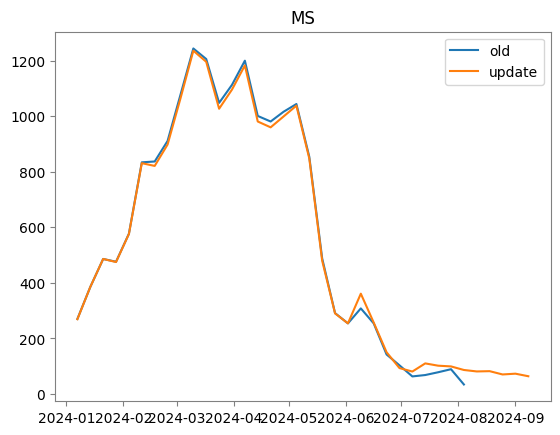

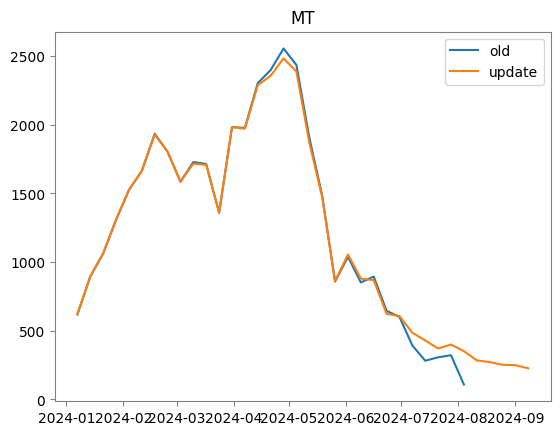

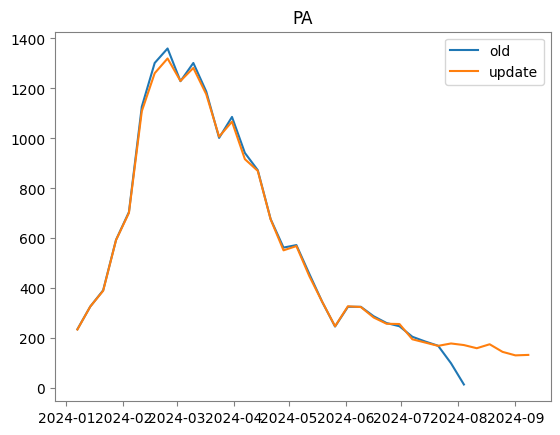

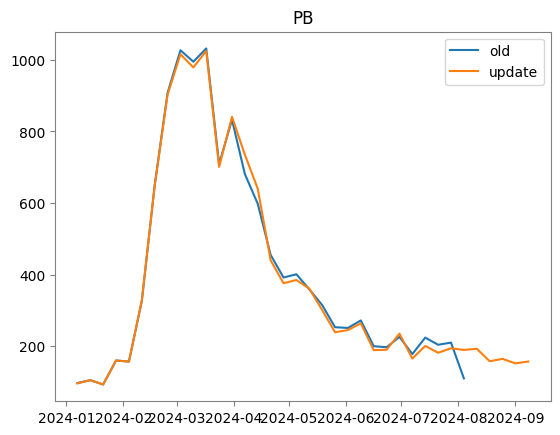

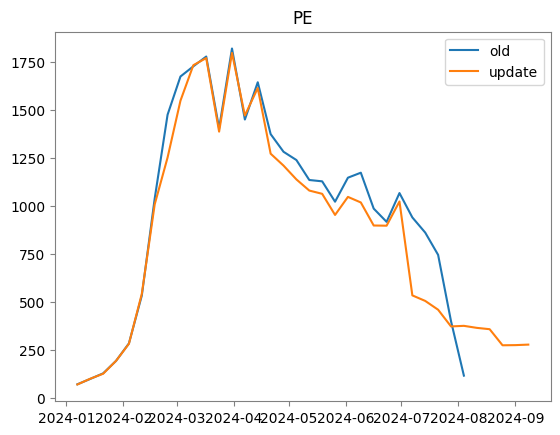

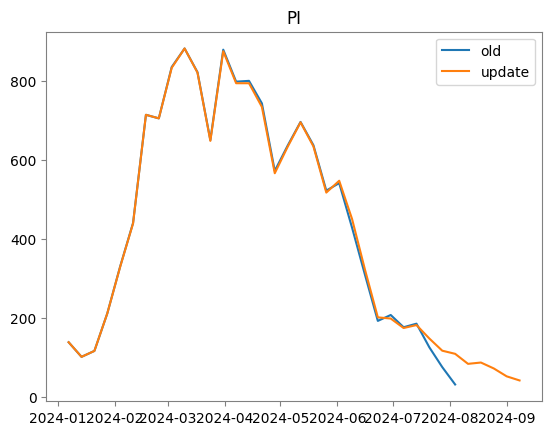

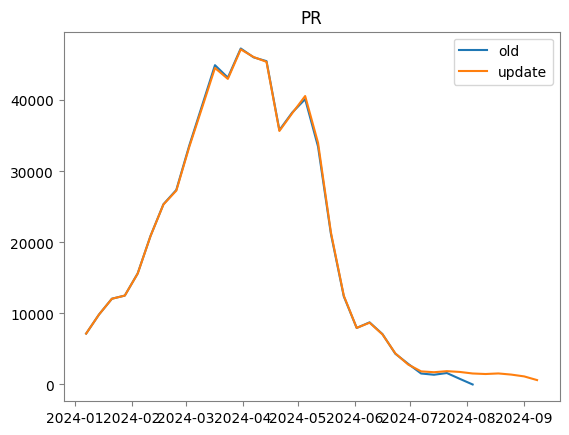

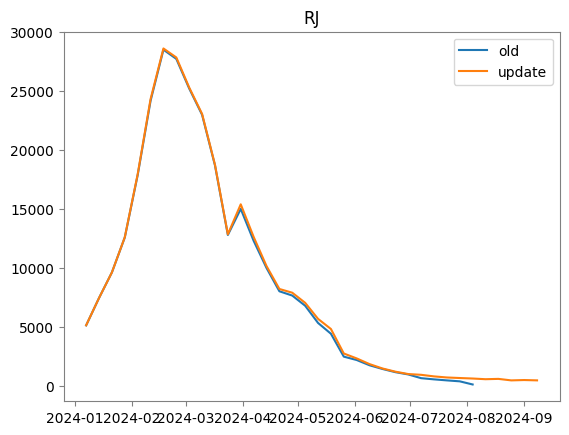

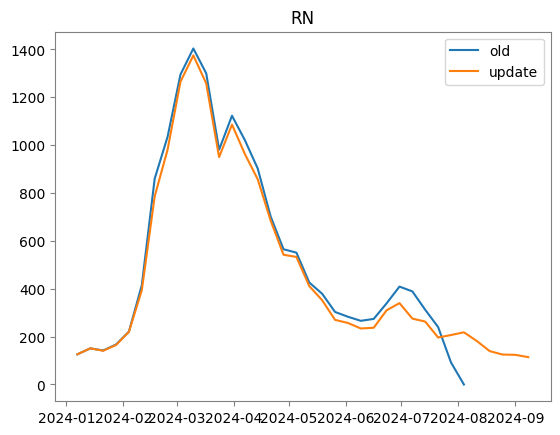

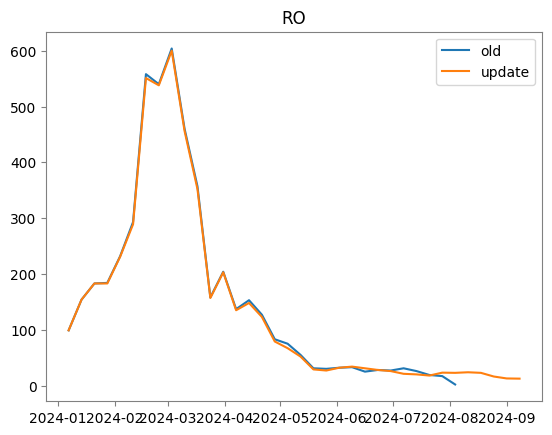

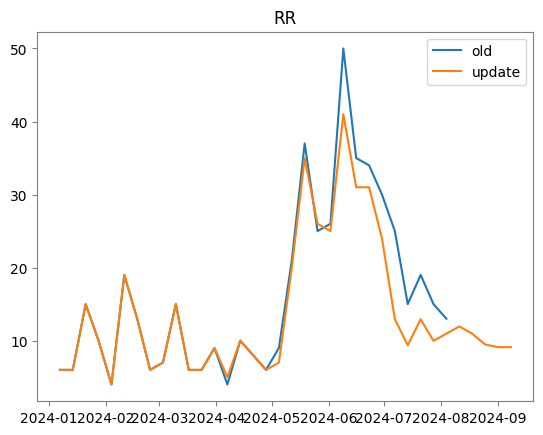

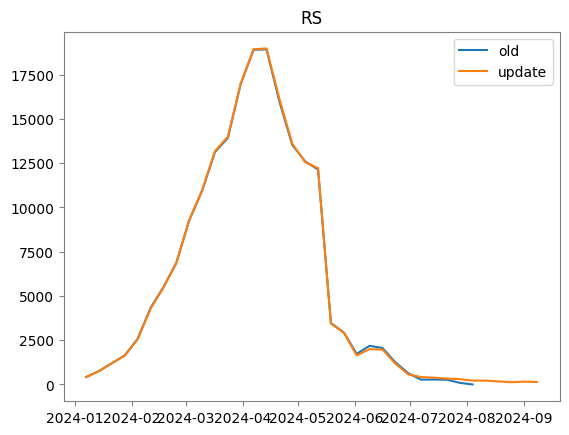

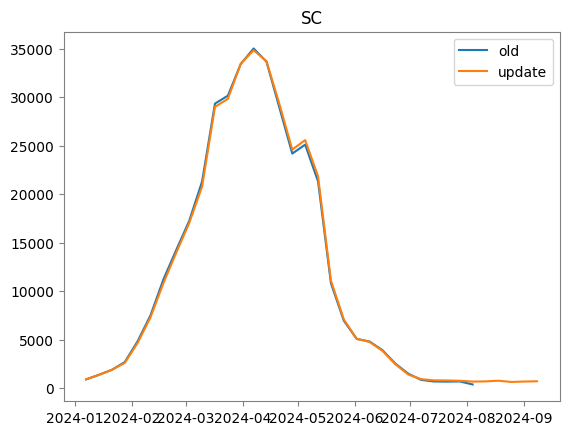

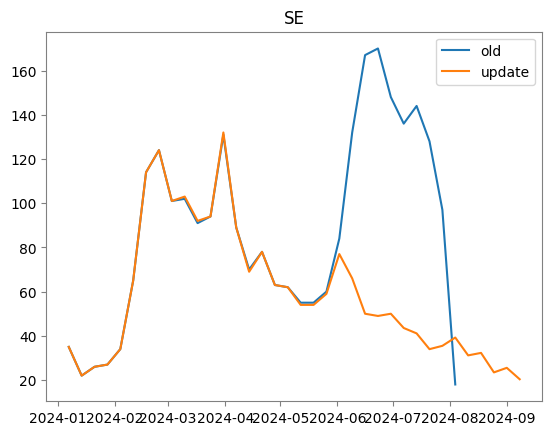

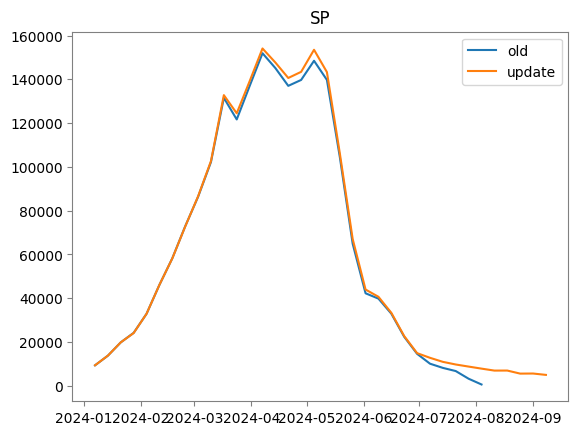

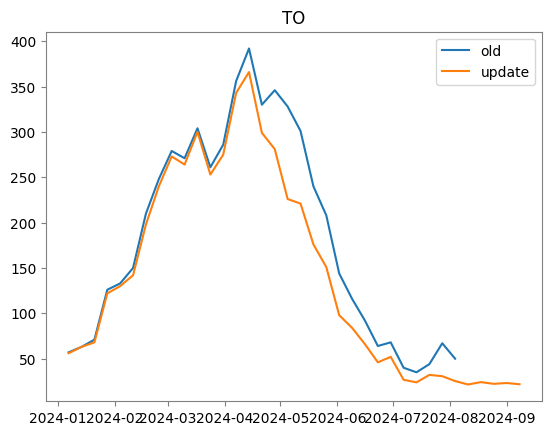

In [7]:
for state in df2.uf.unique(): 

    fig,ax = plt.subplots()

    ax.plot(df1.loc[df1.uf == state].date, df1.loc[df1.uf == state].casos, color = 'tab:blue', label = 'old')

    ax.plot(df2.loc[df2.uf == state].date, df2.loc[df2.uf == state].casos, color = 'tab:orange', label = 'update')

    ax.set_title(state)

    ax.legend()

    plt.show()
    
    